# Least Squares Method on Gold Price Prediction

#### by Ahmad Fakhrudin A 

### Library

matplotlib digunakan untuk plotting data, sedangkan csv untuk mengambil data dari file .csv

In [37]:
import matplotlib.pyplot as plt

In [38]:
import csv

### Preprocessing

Dataset yang digunakan adalah harga emas per ounce (USD) rata-rata tiap bulan dari Januari 1950 hingga Juli 2020. Data yang begitu banyak yaitu dari tahun 1950, perlu untuk dipilah agar hasil regresi lebih akurat. Data yang diambil hanya berjumlah 25 (juli 2018 - juli 2020) yang perbedaannya tidak terlalu jauh. Tujuan dari regresi ini adalah untuk mengetahui perkiraan harga emas bulan berikutnya yaitu Agustus 2020.
Jika harga emas naik maka emas layak untuk dibeli, jika turun maka tidak beli atau jual yang sudah ada.

In [39]:
prices = []
dates = []

In [40]:
with open('monthly_csv.csv', 'r') as csvfile:
    data = csv.reader(csvfile)
    next(data)
    for row in data:
        prices.append(row[1])
        dates.append(row[0])

In [41]:
dataLength = len(prices)
prices = prices[(dataLength-25):dataLength]
for x in range(0, len(prices)):
    prices[x] = float(prices[x])

Text(0.5, 1.0, 'Juli 2018 - Juli 2020')

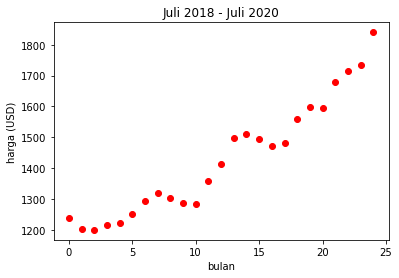

In [42]:
x = list(range(0, len(prices)))
plt.plot(x, prices,'ro')
plt.xlabel('bulan')
plt.ylabel('harga (USD)')
plt.title('Juli 2018 - Juli 2020')

### Least Squares Approximation 

Berikut adalah proses perhitungan parameter a dan b dalam persamaan regresi (polinomial orde-1).

In [43]:
n = len(prices)
sigmaxy = 0; sigmax = 0; sigmay = 0; sigmaxs = 0
for num in range(0, n-1):
    sigmaxy = sigmaxy + x[num]*prices[num]
    sigmax = sigmax + x[num]
    sigmay = sigmay + prices[num]
    sigmaxs = sigmaxs + x[num]**2
ymean = sigmay/n
xmean = sigmax/n
beta = (n*sigmaxy - sigmax*sigmay)/(n*sigmaxs - sigmax**2)
alpha = ymean - beta*xmean
print('parameter b =', beta)
print('parameter a =', alpha)

parameter b = 33.39525444806416
parameter a = 988.0782708933717


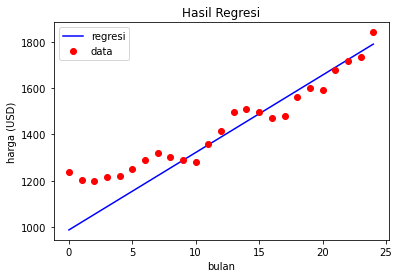

In [44]:
xreg = list(range(0, len(x)))
yreg = []
for num in range(0, n):
    reg = beta*xreg[num] + alpha
    yreg.append(reg)
plt.plot(xreg, yreg, 'b', label='regresi')
plt.plot(x, prices, 'ro', label='data')
plt.xlabel('bulan')
plt.ylabel('harga (USD)')
plt.title('Hasil Regresi')
plt.legend()

## Error

Perhitungan nilai Error untuk menggambarkan seberapa fit garis regresi dengan data.

In [45]:
err = []
absErr = 0
for i in range(0, n):
    error = prices[i] - yreg[i]
    err.append(abs(error))
    absErr = absErr + abs(error)**2
print('Least Squares Error =', absErr)

Least Squares Error = 200887.77213715087


Didapatkan nilai error yang cukup tinggi.

## Hasil Prediksi

In [46]:
predPrice = beta*n + alpha
print('Prediksi harga emas bulan depan (Agustus 2020) = ', predPrice, 'USD')

Prediksi harga emas bulan depan (Agustus 2020) =  1822.9596320949756 USD


Dengan fakta di atas maka saat ini (pura-puranya Juli 2020) layak untuk membeli emas karena nilainya akan naik.

In [47]:
prices

[1238.064,
 1201.859,
 1199.198,
 1214.726,
 1221.275,
 1249.887,
 1291.63,
 1319.755,
 1302.286,
 1287.65,
 1282.46,
 1358.488,
 1414.611,
 1497.102,
 1510.336,
 1494.765,
 1471.921,
 1480.025,
 1560.668,
 1598.818,
 1593.764,
 1680.03,
 1715.697,
 1734.032,
 1840.807]

In [48]:
yreg

[988.0782708933717,
 1021.4735253414359,
 1054.8687797895,
 1088.2640342375641,
 1121.6592886856283,
 1155.0545431336925,
 1188.4497975817567,
 1221.8450520298209,
 1255.240306477885,
 1288.6355609259492,
 1322.0308153740134,
 1355.4260698220774,
 1388.8213242701418,
 1422.2165787182057,
 1455.61183316627,
 1489.007087614334,
 1522.4023420623982,
 1555.7975965104624,
 1589.1928509585266,
 1622.5881054065908,
 1655.9833598546547,
 1689.3786143027191,
 1722.773868750783,
 1756.1691231988475,
 1789.5643776469115]